<a href="https://colab.research.google.com/github/Sidhtang/FINANCIAL-MODEL-using-machine-learning/blob/main/price_analysis_using_back_testing_and_book_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-206b6950f371>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['vwap'] = (week_data['close'] * week_data['volume']).cumsum() / week_data['volume'].cumsum()
<ipython-input-2-206b6950f371>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['returns'] = week_data['close'].pct_change()
<ipython-input-2-206b6950f371>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

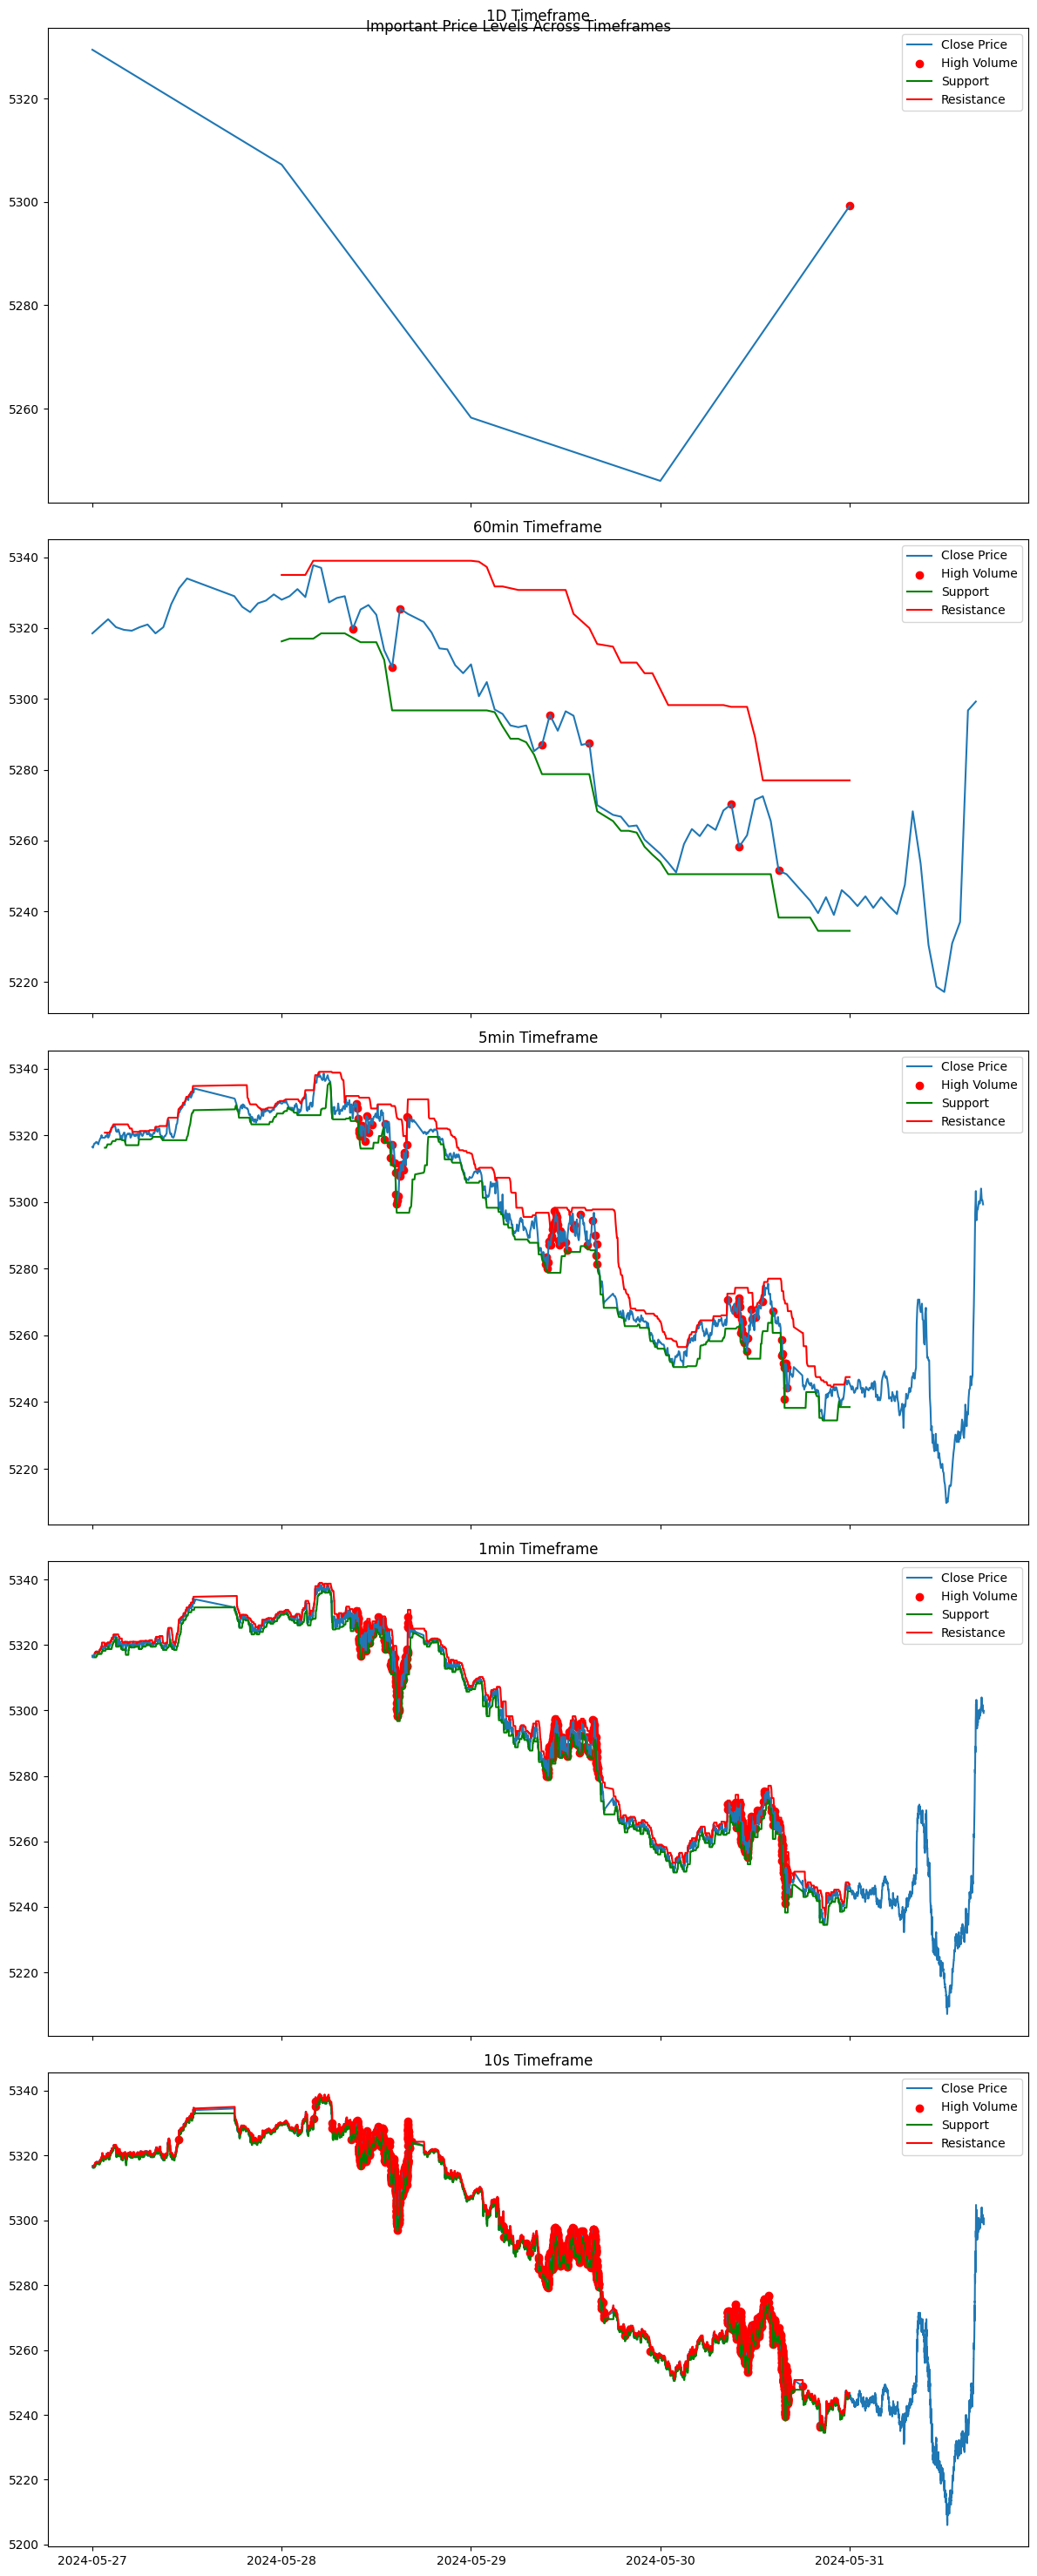

Analysis complete. Check the plot for visualized results across timeframes.

Economic Events:
2024-05-28 08:30: Consumer Confidence (Impact: High)
2024-05-30 08:30: GDP Growth Rate (Impact: High)
2024-05-31 10:00: ISM Manufacturing PMI (Impact: High)

Key price levels for each timeframe:

1D Timeframe:
Number of high volume levels: 1
Average support level: nan
Average resistance level: nan
Average volatility: nan
Number of significant gaps: 0

60min Timeframe:
Number of high volume levels: 9
Average support level: 5277.24
Average resistance level: 5316.65
Average volatility: 0.0161
Number of significant gaps: 1

5min Timeframe:
Number of high volume levels: 106
Average support level: 5290.98
Average resistance level: 5301.18
Average volatility: 0.0045
Number of significant gaps: 3

1min Timeframe:
Number of high volume levels: 527
Average support level: 5293.78
Average resistance level: 5298.31
Average volatility: 0.0019
Number of significant gaps: 6

10s Timeframe:
Number of high volu

In [2]:
# @title genral method
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def load_and_preprocess_data(file_paths):
    dataframes = {}
    for timeframe, file_path in file_paths.items():
        df = pd.read_csv(file_path)
        df['ts_event'] = pd.to_datetime(df['ts_event'])
        df.set_index('ts_event', inplace=True)
        dataframes[timeframe] = df
    return dataframes

def identify_important_prices(df, start_date, end_date, window_size=20):
    # Filter data for the specified week
    mask = (df.index >= start_date) & (df.index <= end_date)
    week_data = df.loc[mask]

    # Calculate volume-weighted average price (VWAP)
    week_data['vwap'] = (week_data['close'] * week_data['volume']).cumsum() / week_data['volume'].cumsum()

    # Identify price levels with high volume
    volume_threshold = week_data['volume'].quantile(0.9)
    high_volume_levels = week_data[week_data['volume'] > volume_threshold]['close']

    # Identify support and resistance levels
    support_levels = week_data['low'].rolling(window=window_size).min()
    resistance_levels = week_data['high'].rolling(window=window_size).max()

    # Calculate price volatility
    week_data['returns'] = week_data['close'].pct_change()
    volatility = week_data['returns'].rolling(window=window_size).std() * np.sqrt(252)

    # Identify gap levels
    gaps = week_data['open'] - week_data['close'].shift(1)
    significant_gaps = gaps[abs(gaps) > gaps.std() * 2]

    return {
        'high_volume_levels': high_volume_levels,
        'support_levels': support_levels,
        'resistance_levels': resistance_levels,
        'volatility': volatility,
        'significant_gaps': significant_gaps
    }

def analyze_economic_events(start_date, end_date):
    # This function would typically fetch data from an economic calendar API

    events = [
        {'date': '2024-05-28', 'time': '08:30', 'event': 'Consumer Confidence', 'impact': 'High'},
        {'date': '2024-05-30', 'time': '08:30', 'event': 'GDP Growth Rate', 'impact': 'High'},
        {'date': '2024-05-31', 'time': '10:00', 'event': 'ISM Manufacturing PMI', 'impact': 'High'}
    ]
    return events

def plot_important_prices(dataframes, results, start_date, end_date):
    fig, axes = plt.subplots(len(dataframes), 1, figsize=(12, 6*len(dataframes)), sharex=True)
    fig.suptitle('Important Price Levels Across Timeframes')

    for i, (timeframe, df) in enumerate(dataframes.items()):
        ax = axes[i] if len(dataframes) > 1 else axes
        ax.plot(df.loc[start_date:end_date, 'close'], label='Close Price')
        ax.scatter(results[timeframe]['high_volume_levels'].index, results[timeframe]['high_volume_levels'], color='red', label='High Volume')
        ax.plot(results[timeframe]['support_levels'].loc[start_date:end_date], color='green', label='Support')
        ax.plot(results[timeframe]['resistance_levels'].loc[start_date:end_date], color='red', label='Resistance')
        ax.set_title(f'{timeframe} Timeframe')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Main analysis function
def analyze_week(dataframes, start_date, end_date):
    results = {}
    for timeframe, df in dataframes.items():
        results[timeframe] = identify_important_prices(df, start_date, end_date)

    economic_events = analyze_economic_events(start_date, end_date)
    plot_important_prices(dataframes, results, start_date, end_date)

    return results, economic_events

# Example usage
start_date = '2024-05-27'
end_date = '2024-05-31'

file_paths = {
    '1D': '1D.csv',
    '60min': '60min.csv',
    '5min': '5min.csv',
    '1min': '1min.csv',
    '10s': '10s.csv'
}

dataframes = load_and_preprocess_data(file_paths)
results, economic_events = analyze_week(dataframes, start_date, end_date)

print("Analysis complete. Check the plot for visualized results across timeframes.")
print("\nEconomic Events:")
for event in economic_events:
    print(f"{event['date']} {event['time']}: {event['event']} (Impact: {event['impact']})")

print("\nKey price levels for each timeframe:")
for timeframe, result in results.items():
    print(f"\n{timeframe} Timeframe:")
    print(f"Number of high volume levels: {len(result['high_volume_levels'])}")
    print(f"Average support level: {result['support_levels'].mean():.2f}")
    print(f"Average resistance level: {result['resistance_levels'].mean():.2f}")
    print(f"Average volatility: {result['volatility'].mean():.4f}")
    print(f"Number of significant gaps: {len(result['significant_gaps'])}")

Analysis complete. Check the plot for visualized results across timeframes.

Economic Events:

Key price levels for each timeframe:

1D Timeframe:
Number of high volume levels: 1
Average support level: nan
Average resistance level: nan
Average volatility: nan
Number of significant gaps: 0

60min Timeframe:
Number of high volume levels: 9
Average support level: 5277.24
Average resistance level: 5316.65
Average volatility: 0.0161
Number of significant gaps: 1

5min Timeframe:
Number of high volume levels: 106
Average support level: 5290.98
Average resistance level: 5301.18
Average volatility: 0.0045
Number of significant gaps: 3

1min Timeframe:
Number of high volume levels: 527
Average support level: 5293.78
Average resistance level: 5298.31
Average volatility: 0.0019
Number of significant gaps: 6

10s Timeframe:
Number of high volume levels: 2836
Average support level: 5293.33
Average resistance level: 5295.31
Average volatility: 0.0009
Number of significant gaps: 34
Strategy returns: 

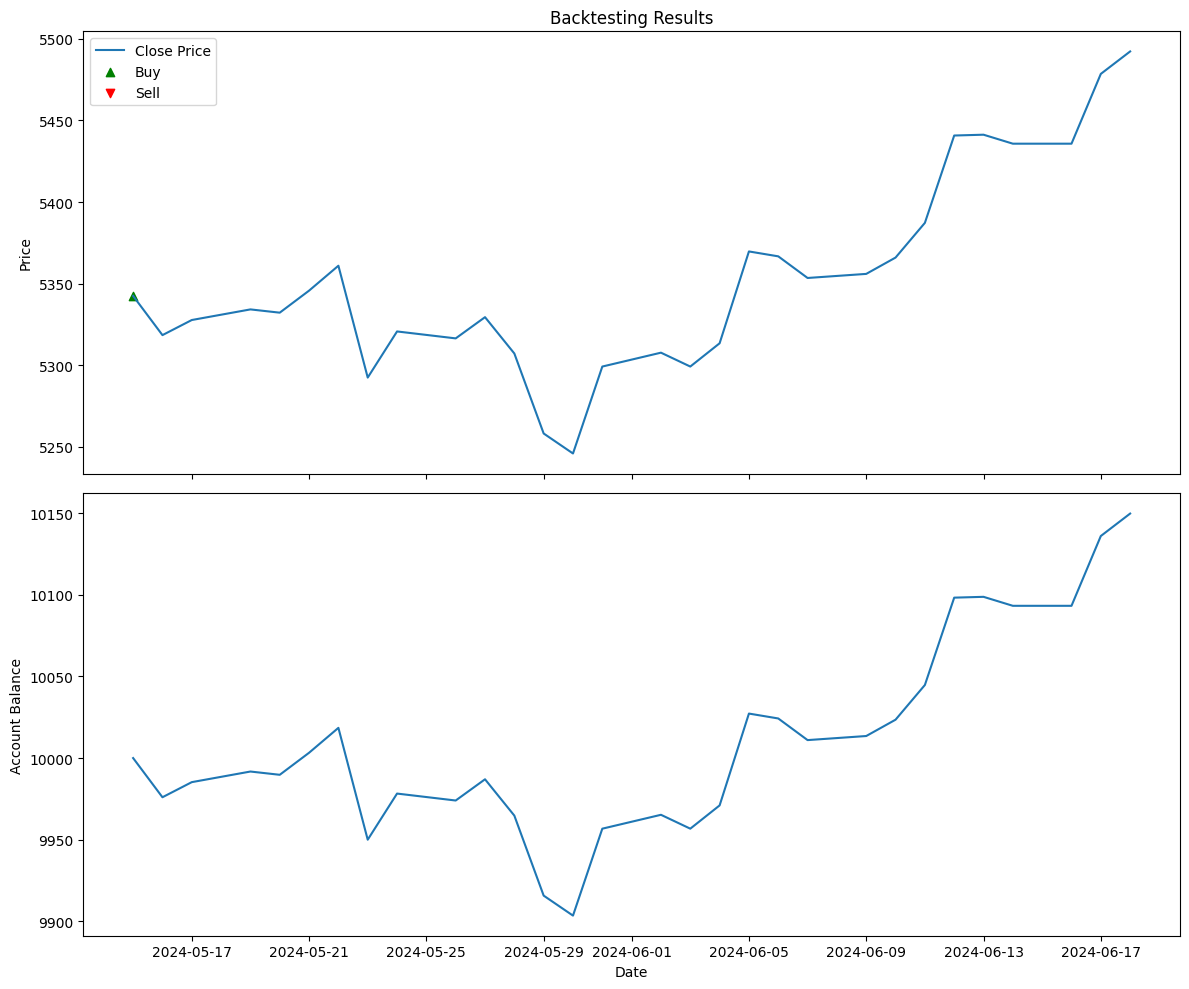


Backtesting complete. Check the plot for visualized results.


In [9]:
# @title  backtesting method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def load_and_preprocess_data(file_paths):
    dataframes = {}
    for timeframe, file_path in file_paths.items():
        df = pd.read_csv(file_path)
        df['ts_event'] = pd.to_datetime(df['ts_event'])
        df.set_index('ts_event', inplace=True)
        dataframes[timeframe] = df
    return dataframes

def identify_important_prices(df, start_date, end_date, window_size=20):
    mask = (df.index >= start_date) & (df.index <= end_date)
    week_data = df.loc[mask].copy()

    if len(week_data) == 0:
        print(f"No data available for the specified date range: {start_date} to {end_date}")
        return None

    week_data['vwap'] = (week_data['close'] * week_data['volume']).cumsum() / week_data['volume'].cumsum()
    volume_threshold = week_data['volume'].quantile(0.9)
    high_volume_levels = week_data[week_data['volume'] > volume_threshold]['close']
    week_data['support_levels'] = week_data['low'].rolling(window=window_size).min()
    week_data['resistance_levels'] = week_data['high'].rolling(window=window_size).max()
    week_data['returns'] = week_data['close'].pct_change()
    week_data['volatility'] = week_data['returns'].rolling(window=window_size).std() * np.sqrt(252)
    gaps = week_data['open'] - week_data['close'].shift(1)
    significant_gaps = gaps[abs(gaps) > gaps.std() * 2]

    return {
        'high_volume_levels': high_volume_levels,
        'support_levels': week_data['support_levels'],
        'resistance_levels': week_data['resistance_levels'],
        'volatility': week_data['volatility'],
        'significant_gaps': significant_gaps
    }

def analyze_week(dataframes, start_date, end_date):
    results = {}
    for timeframe, df in dataframes.items():
        results[timeframe] = identify_important_prices(df, start_date, end_date)

    economic_events = []  # Placeholder for economic events

    return results, economic_events

class BacktestingFramework:
    def __init__(self, data, initial_balance=10000):
        self.data = data
        self.initial_balance = initial_balance
        self.balance = initial_balance
        self.position = 0
        self.trades = []

    def execute_trade(self, action, price, timestamp):
        if action == 'BUY' and self.balance > 0:
            shares = self.balance // price
            cost = shares * price
            self.balance -= cost
            self.position += shares
            self.trades.append({
                'timestamp': timestamp,
                'action': 'BUY',
                'price': price,
                'shares': shares,
                'cost': cost
            })
        elif action == 'SELL' and self.position > 0:
            revenue = self.position * price
            self.balance += revenue
            self.trades.append({
                'timestamp': timestamp,
                'action': 'SELL',
                'price': price,
                'shares': self.position,
                'revenue': revenue
            })
            self.position = 0

    def run_backtest(self, strategy):
        for timestamp, row in self.data.iterrows():
            action = strategy(row, self.position)
            if action:
                self.execute_trade(action, row['close'], timestamp)

    def calculate_returns(self):
        if not self.trades:
            return 0
        final_balance = self.balance + (self.position * self.data.iloc[-1]['close'])
        return (final_balance - self.initial_balance) / self.initial_balance * 100

    def plot_results(self):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

        ax1.plot(self.data.index, self.data['close'], label='Close Price')
        ax1.set_ylabel('Price')
        ax1.set_title('Backtesting Results')

        buy_points = [trade for trade in self.trades if trade['action'] == 'BUY']
        sell_points = [trade for trade in self.trades if trade['action'] == 'SELL']

        ax1.scatter([trade['timestamp'] for trade in buy_points],
                    [trade['price'] for trade in buy_points],
                    marker='^', color='g', label='Buy')
        ax1.scatter([trade['timestamp'] for trade in sell_points],
                    [trade['price'] for trade in sell_points],
                    marker='v', color='r', label='Sell')

        ax1.legend()

        balance_over_time = self.calculate_balance_over_time()
        ax2.plot(balance_over_time.index, balance_over_time.values)
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Account Balance')

        plt.tight_layout()
        plt.show()

    def calculate_balance_over_time(self):
        balance_over_time = pd.Series(index=self.data.index, dtype=float)
        current_balance = self.initial_balance
        current_position = 0

        for timestamp, row in self.data.iterrows():
            for trade in self.trades:
                if trade['timestamp'] == timestamp:
                    if trade['action'] == 'BUY':
                        current_balance -= trade['cost']
                        current_position += trade['shares']
                    elif trade['action'] == 'SELL':
                        current_balance += trade['revenue']
                        current_position = 0

            balance_over_time[timestamp] = current_balance + (current_position * row['close'])

        return balance_over_time

def simple_moving_average_strategy(row, current_position, short_window=10, long_window=50):
    if row['SMA_short'] > row['SMA_long'] and current_position == 0:
        return 'BUY'
    elif row['SMA_short'] < row['SMA_long'] and current_position > 0:
        return 'SELL'
    return None

def backtest_strategy(df, strategy, initial_balance=10000):
    backtester = BacktestingFramework(df, initial_balance)
    backtester.run_backtest(strategy)
    returns = backtester.calculate_returns()
    print(f"Strategy returns: {returns:.2f}%")
    backtester.plot_results()
    return backtester

# Example usage
if __name__ == "__main__":
    start_date = '2024-05-27'
    end_date = '2024-05-31'

    file_paths = {
        '1D': '1D.csv',
        '60min': '60min.csv',
        '5min': '5min.csv',
        '1min': '1min.csv',
        '10s': '10s.csv'
    }

    dataframes = load_and_preprocess_data(file_paths)
    results, economic_events = analyze_week(dataframes, start_date, end_date)

    print("Analysis complete. Check the plot for visualized results across timeframes.")
    print("\nEconomic Events:")
    for event in economic_events:
        print(f"{event['date']} {event['time']}: {event['event']} (Impact: {event['impact']})")

    print("\nKey price levels for each timeframe:")
    for timeframe, result in results.items():
        if result is None:
            print(f"\n{timeframe} Timeframe: No data available for analysis")
            continue

        print(f"\n{timeframe} Timeframe:")
        print(f"Number of high volume levels: {len(result['high_volume_levels'])}")
        print(f"Average support level: {result['support_levels'].mean():.2f}")
        print(f"Average resistance level: {result['resistance_levels'].mean():.2f}")
        print(f"Average volatility: {result['volatility'].mean():.4f}")
        print(f"Number of significant gaps: {len(result['significant_gaps'])}")

    # Prepare data for backtesting
    df = dataframes['1D']  # Use daily data for this example
    df['SMA_short'] = df['close'].rolling(window=10).mean()
    df['SMA_long'] = df['close'].rolling(window=50).mean()
    df = df.dropna()  # Remove NaN values

    # Run backtest
    backtest_results = backtest_strategy(df, simple_moving_average_strategy)

    print("\nBacktesting complete. Check the plot for visualized results.")

Order Book Analysis:
Support Levels: {98: 200.0, 99: 100.0}
Resistance Levels: {101: 150.0, 102: 100.0}

Futures Analysis:
Average Basis: -13.433421468167326
Average Funding Rate: -13.433421468167326

Correlated Assets:
Asset1: Correlation = 0.20
Asset2: Correlation = -0.15

Liquidation Levels:
       long_liquidation  short_liquidation
count        100.000000         100.000000
mean          69.129592         103.694388
std            4.660008           6.990012
min           62.585227          93.877841
25%           65.022634          97.533951
50%           68.440643         102.660964
75%           72.969233         109.453849
max           80.161010         120.241516

Volume Profile:
High Volume Nodes:
    price_level   volume
17   100.069475  71074.0
16    99.584520  71066.0
19   101.039384  52241.0


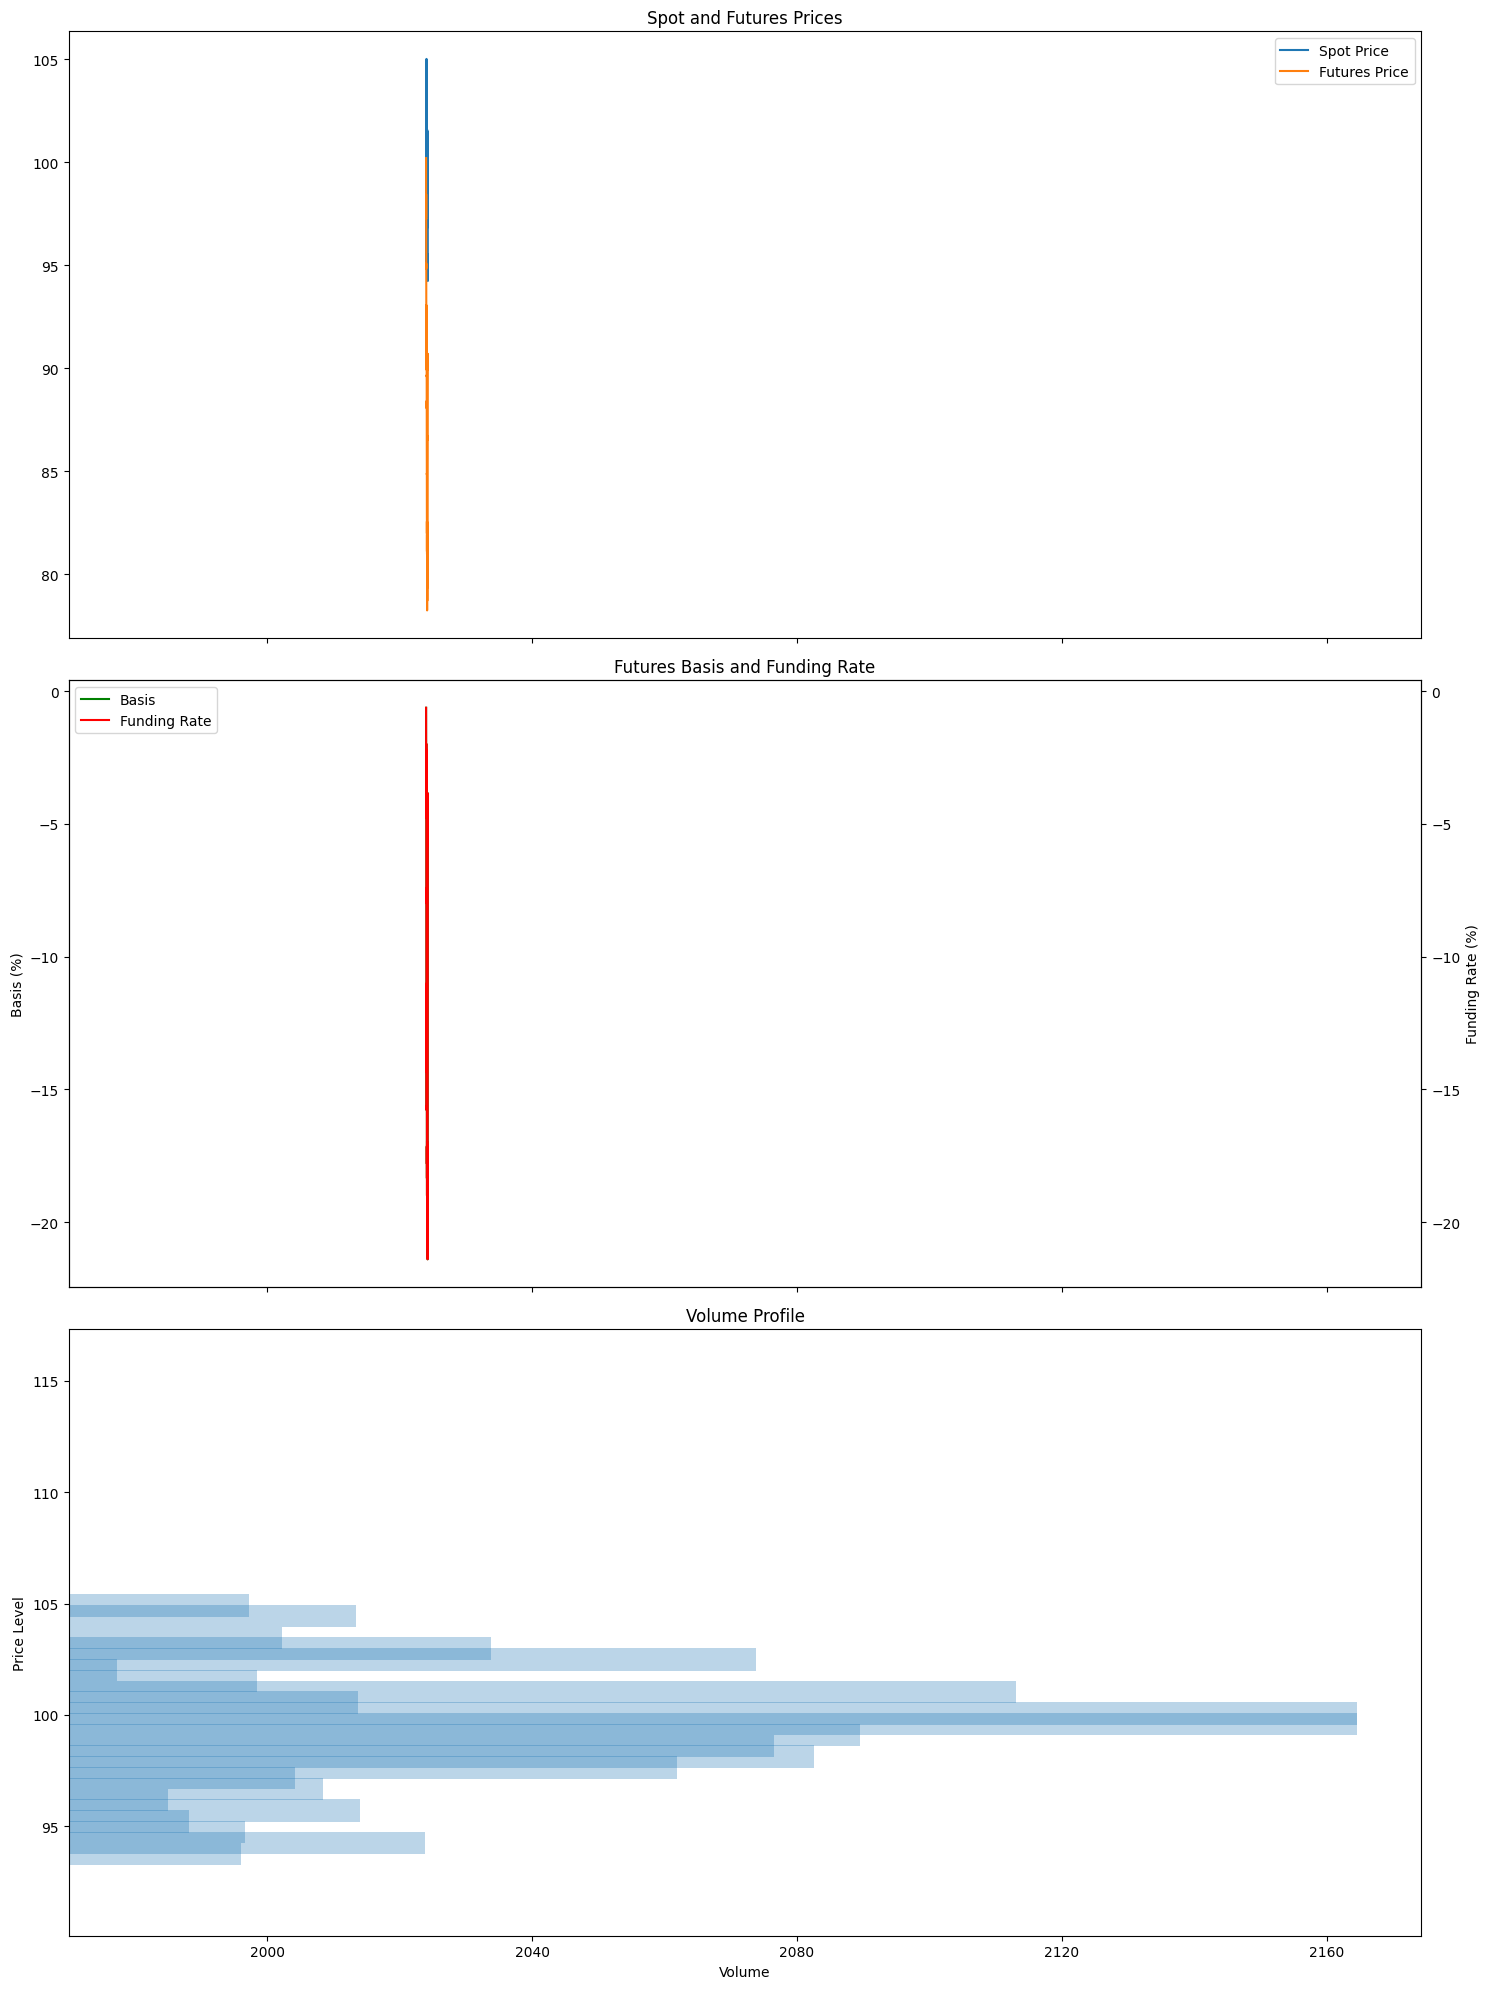

In [10]:
# @title backtesting method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from collections import defaultdict

class EnhancedMarketAnalysis:
    def __init__(self, spot_data, order_book_data, futures_data, correlated_assets_data):
        self.spot_data = spot_data
        self.order_book_data = order_book_data
        self.futures_data = futures_data
        self.correlated_assets_data = correlated_assets_data

    def analyze_order_book(self, depth=10):
        """Analyze the order book to identify key support and resistance levels."""
        support_levels = defaultdict(float)
        resistance_levels = defaultdict(float)

        for timestamp, book in self.order_book_data.items():
            bids = sorted(book['bids'], key=lambda x: x[0], reverse=True)[:depth]
            asks = sorted(book['asks'], key=lambda x: x[0])[:depth]

            for price, volume in bids:
                support_levels[price] += volume

            for price, volume in asks:
                resistance_levels[price] += volume

        return {
            'support_levels': dict(sorted(support_levels.items(), key=lambda x: x[1], reverse=True)[:5]),
            'resistance_levels': dict(sorted(resistance_levels.items(), key=lambda x: x[1], reverse=True)[:5])
        }

    def calculate_futures_basis(self):
        """Calculate the basis between spot and futures prices."""
        basis = []
        for spot, future in zip(self.spot_data['close'], self.futures_data['close']):
            basis.append((future - spot) / spot * 100)
        return pd.Series(basis, index=self.spot_data.index)

    def analyze_correlated_assets(self):
        """Analyze correlations between the main asset and correlated assets."""
        correlations = {}
        for asset, data in self.correlated_assets_data.items():
            if len(self.spot_data) == len(data):
                corr, _ = pearsonr(self.spot_data['close'], data['close'])
                correlations[asset] = corr
        return correlations

    def calculate_funding_rate(self):
        """Calculate the funding rate for perpetual futures."""
        funding_rate = (self.futures_data['close'] - self.spot_data['close']) / self.spot_data['close']
        return funding_rate * 100  # Convert to percentage

    def identify_liquidation_levels(self, leverage=5):
        """Identify potential liquidation levels based on futures prices and leverage."""
        long_liq = self.futures_data['close'] * (1 - 1/leverage)
        short_liq = self.futures_data['close'] * (1 + 1/leverage)
        return pd.DataFrame({'long_liquidation': long_liq, 'short_liquidation': short_liq}, index=self.futures_data.index)

    def calculate_volume_profile(self, bins=50):
        """Calculate the volume profile to identify high volume nodes."""
        price_range = np.linspace(self.spot_data['low'].min(), self.spot_data['high'].max(), bins)
        volume_profile = np.zeros(bins)

        for _, row in self.spot_data.iterrows():
            idx = np.digitize(row['close'], price_range) - 1
            volume_profile[idx] += row['volume']

        return pd.DataFrame({'price_level': price_range, 'volume': volume_profile})

    def plot_analysis(self):
        """Plot the comprehensive analysis results."""
        fig, axs = plt.subplots(3, 1, figsize=(15, 20), sharex=True)

        # Plot 1: Spot and Futures Prices
        axs[0].plot(self.spot_data.index, self.spot_data['close'], label='Spot Price')
        axs[0].plot(self.futures_data.index, self.futures_data['close'], label='Futures Price')
        axs[0].set_title('Spot and Futures Prices')
        axs[0].legend()

        # Plot 2: Basis and Funding Rate
        basis = self.calculate_futures_basis()
        funding_rate = self.calculate_funding_rate()
        ax2 = axs[1].twinx()
        axs[1].plot(basis.index, basis, label='Basis', color='g')
        ax2.plot(funding_rate.index, funding_rate, label='Funding Rate', color='r')
        axs[1].set_ylabel('Basis (%)')
        ax2.set_ylabel('Funding Rate (%)')
        axs[1].set_title('Futures Basis and Funding Rate')
        lines1, labels1 = axs[1].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        axs[1].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

        # Plot 3: Volume Profile
        volume_profile = self.calculate_volume_profile()
        axs[2].barh(volume_profile['price_level'], volume_profile['volume'], height=1, alpha=0.3)
        axs[2].set_title('Volume Profile')
        axs[2].set_ylabel('Price Level')
        axs[2].set_xlabel('Volume')

        plt.tight_layout()
        plt.show()

    def run_analysis(self):
        """Run the comprehensive market analysis."""
        order_book_analysis = self.analyze_order_book()
        basis = self.calculate_futures_basis()
        correlations = self.analyze_correlated_assets()
        funding_rate = self.calculate_funding_rate()
        liquidation_levels = self.identify_liquidation_levels()
        volume_profile = self.calculate_volume_profile()

        print("Order Book Analysis:")
        print("Support Levels:", order_book_analysis['support_levels'])
        print("Resistance Levels:", order_book_analysis['resistance_levels'])

        print("\nFutures Analysis:")
        print("Average Basis:", basis.mean())
        print("Average Funding Rate:", funding_rate.mean())

        print("\nCorrelated Assets:")
        for asset, corr in correlations.items():
            print(f"{asset}: Correlation = {corr:.2f}")

        print("\nLiquidation Levels:")
        print(liquidation_levels.describe())

        print("\nVolume Profile:")
        high_volume_nodes = volume_profile.nlargest(3, 'volume')
        print("High Volume Nodes:")
        print(high_volume_nodes)

        self.plot_analysis()

# Example usage
if __name__ == "__main__":

    spot_data = pd.DataFrame({
        'close': np.random.randn(100).cumsum() + 100,
        'volume': np.random.randint(1000, 10000, 100),
        'high': np.random.randn(100).cumsum() + 102,
        'low': np.random.randn(100).cumsum() + 98
    }, index=pd.date_range(start='2024-01-01', periods=100))

    order_book_data = {pd.Timestamp('2024-01-01'): {'bids': [(99, 100), (98, 200)], 'asks': [(101, 150), (102, 100)]}}

    futures_data = pd.DataFrame({
        'close': np.random.randn(100).cumsum() + 101
    }, index=pd.date_range(start='2024-01-01', periods=100))

    correlated_assets_data = {
        'Asset1': pd.DataFrame({'close': np.random.randn(100).cumsum() + 50}, index=pd.date_range(start='2024-01-01', periods=100)),
        'Asset2': pd.DataFrame({'close': np.random.randn(100).cumsum() + 75}, index=pd.date_range(start='2024-01-01', periods=100))
    }

    analysis = EnhancedMarketAnalysis(spot_data, order_book_data, futures_data, correlated_assets_data)
    analysis.run_analysis()